# Review behaviour:

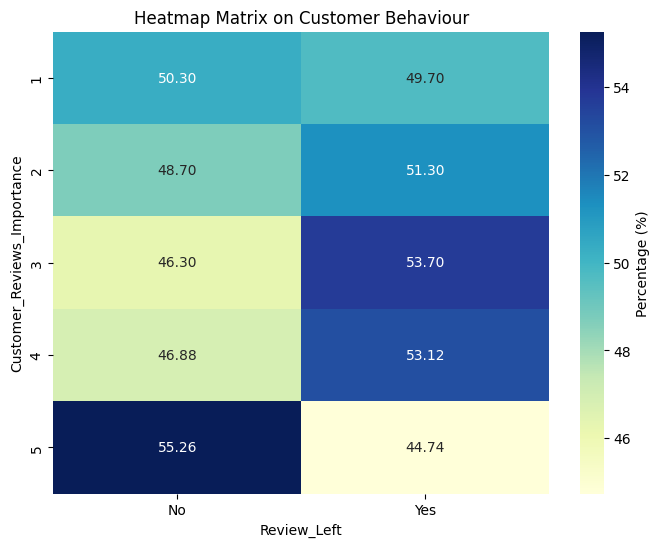

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data from the CSV file
data = pd.read_csv('chaya.csv')

# Calculate the percentage occurrence for each combination of values
heatmap_data = data.groupby(['Customer_Reviews_Importance', 'Review_Left']).size().unstack()
heatmap_data = heatmap_data.div(heatmap_data.sum(axis=1), axis=0) * 100

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='YlGnBu', cbar_kws={'label': 'Percentage (%)'})

# Customize labels and title
plt.xlabel('Review_Left')
plt.ylabel('Customer_Reviews_Importance')
plt.title('Heatmap Matrix on Customer Behaviour')

# Show the heatmap
plt.show()


# Recommendation behaviour

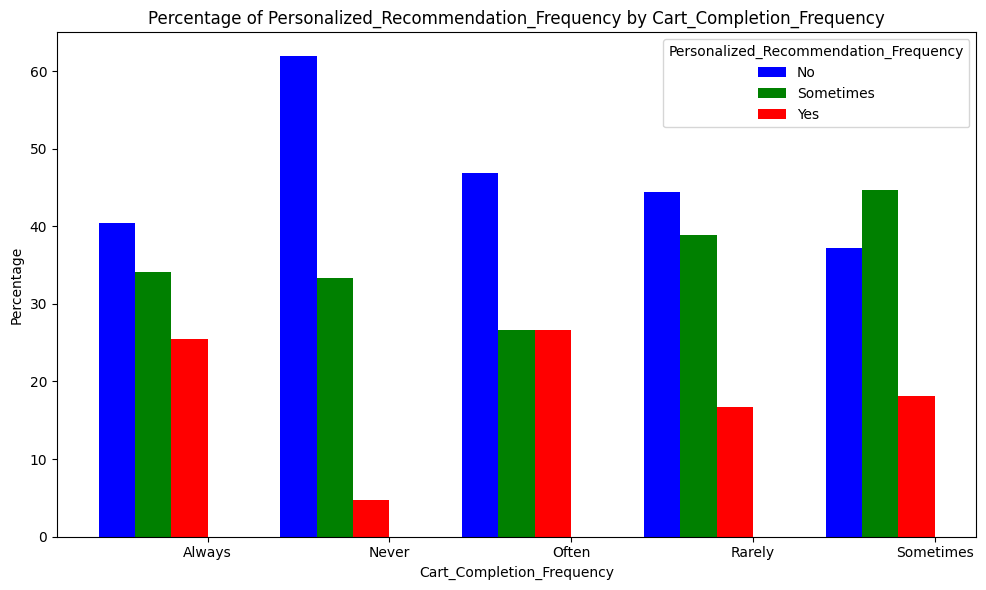

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
data = pd.read_csv("chaya.csv")

# Group the data by Cart_Completion_Frequency and Personalized_Recommendation_Frequency
grouped = data.groupby(['Cart_Completion_Frequency', 'Personalized_Recommendation_Frequency']).size().unstack(fill_value=0)

# Calculate the percentage of each Personalized_Recommendation_Frequency within each Cart_Completion_Frequency
percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Create a multi-layered bar graph
fig, ax = plt.subplots(figsize=(10, 6))

# Get a list of unique Cart_Completion_Frequency for x-axis labels
x_categories = percentages.index

# Set the width of each bar
width = 0.2

# Define colors for Personalized_Recommendation_Frequency categories
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

# Iterate through the Personalized_Recommendation_Frequency categories
for i, prf_category in enumerate(percentages.columns):
    plt.bar(
        [pos + width * i for pos in range(len(x_categories))],
        percentages[prf_category],
        width=width,
        label=prf_category,
        color=colors[i]
    )

plt.xlabel("Cart_Completion_Frequency")
plt.ylabel("Percentage")
plt.title("Percentage of Personalized_Recommendation_Frequency by Cart_Completion_Frequency")
plt.xticks([pos + width * 2.5 for pos in range(len(x_categories))], x_categories)
plt.legend(title="Personalized_Recommendation_Frequency")
plt.tight_layout()

# Show the plot
plt.show()
